## Visualize Atmospheric Data
This section will show, how one can visualize the given atmospheric data. This is usually done using the 'make_atmo_map' function.

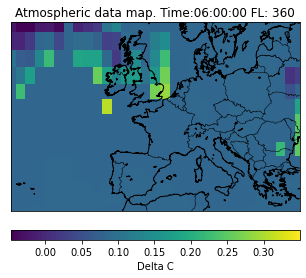

In [1]:
import quantimize.visualisation as vs
from datetime import time as t
import matplotlib.pyplot as plt

vs.make_atmo_map(350, t(8))
plt.show()

This creates a plot with the nearest time, in this case the data from 6am, and the nearest flightlevel, here 260. Below you can see the color scale with the whole range and the corresponding colors for certain values. Values below 0 represent beneficial areas for flying through, while areas in yellow should be less faviorable.
One can also use the option to animate the time for a given flight level or hop through the flightlevels for a given time. This is intended to see and get a feeling for the data. These can be called by:

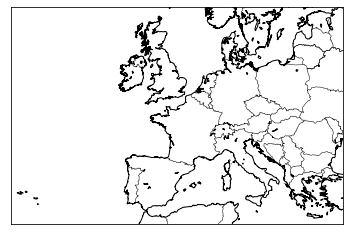

In [2]:
vs.make_animated_atmo_day_map(250)

[100, 125, 150, 175, 200, 225, 250, 300, 350, 400, 450, 500, 550, 600]


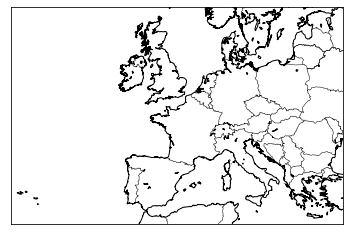

In [3]:
vs.make_animated_atmo_FL_map(t(8))

Since this is a jupyter notebook, the graphics are not animated. You need to call the function from a python console and will see the variing atmospheric data. As completion, it is also mentioned here.

In the next step, we want to show our different solution approaches. First classic, then quantum.

## General visualization

Generate your trajectory, doesn't matter which. If you have it, create a map, either 2D or 3D and then plot the trajectory on the map. E.g. 2D straight line solution:

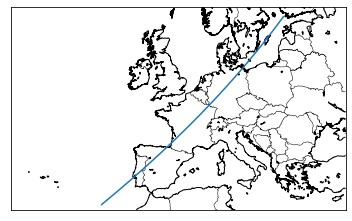

C:\Users\Jakob\AppData\Roaming\Python\Python38\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


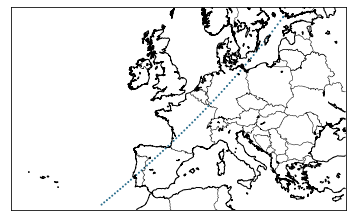

In [4]:
from quantimize.classic.toolbox import straight_line_trajectory as sls
trajectory = sls(5, 300)
map = vs.make_map()
map = vs.plot_flight_path_on_map(map, trajectory)
plt.show()
map = vs.make_map()
map = vs.scatter_flight_path_on_map(map, trajectory)
plt.show()

For this example, you can plot or scatter the points. Up to your preference. The plot color is arbitrary, while the color of the scattered points represent the flight level height. For 3D this can be changed to the atmospheric data, because the flight level can be directly seen.
For a 3D plot, the setup is similar. Generate a trajectory, generate a map and plot the trajectory:

 The best solution found:                                                                           
 [-21.53783737   2.04766238  13.10895577  59.54133928  56.20114097
  58.09811642 349.41401008 319.90123584 392.10772271 333.13196588
 289.0790729 ]

 Objective function:
 836.1354654193757


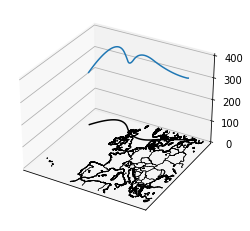

In [5]:
from quantimize.classic.classic_solution import run_genetic_algorithm

plot, solution, trajectory = run_genetic_algorithm(0)
ax, map = vs.make_3d_map()
ax, map = vs.plot_flight_path_on_map_3d(ax,map,trajectory) # Also as scatter available
plt.show()



In this case, it is a plot with arbitrary color. The black line is the route as a projection from above, for better understanding. If you want to plot your flight with atmo data, just use:

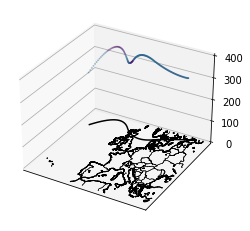

In [6]:
ax, map = vs.make_3d_map()
ax, map = vs.plot_flight_path_on_map_3d_with_atmo_as_points(ax, map, trajectory)
plt.show()

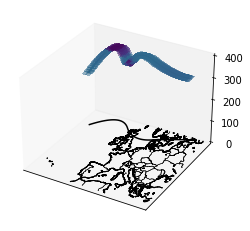

In [7]:
ax, map = vs.make_3d_map()
ax, map = vs.plot_flight_path_on_map_3d_with_atmo_as_slices(ax, map, trajectory)
plt.show()

That are the basics for using visualization. If something is odd, let Jakob know.

## Straight Line Solution and visualisation
The simplest algorithm to find the a way, is the straight line solution

## Sample Run - Classic

In [8]:
from quantimize.classic.classic_solution import run_genetic_algorithm
from quantimize.classic.toolbox import curve_3D_solution, compute_cost

In [9]:
plot, solution, trajectory = run_genetic_algorithm(0)
ctrl_pts = solution['variable']
optimal_cost = solution['function']

 The best solution found:                                                                           
 [-19.20461191  -5.63306446  15.55340693  59.56780581  56.78097069
  59.22616525 385.53446941 296.87731587 398.09865786 315.94170889
 362.88282113]

 Objective function:
 885.4945090876986


### Double check the solution

In [10]:
ctrl_pts

array([-19.20461191,  -5.63306446,  15.55340693,  59.56780581,
        56.78097069,  59.22616525, 385.53446941, 296.87731587,
       398.09865786, 315.94170889, 362.88282113])

In [11]:
tj = curve_3D_solution(0, ctrl_pts)

In [12]:
compute_cost(tj)

885.4945090876986

## Sample Run - Quantum

### Quantum Neural Network

In [14]:
from quantimize.quantum.quantum_neural_network import quantum_neural_network

In [15]:
res = quantum_neural_network(0, 6, ctrl_pts)

Iteration = 2, Number of device executions = 2, Cost = 877.468964511864
Iteration = 3, Number of device executions = 3, Cost = 959.6311834615428
Iteration = 4, Number of device executions = 5, Cost = 906.5678074547604
Iteration = 5, Number of device executions = 6, Cost = 1170.0775150426327
Iteration = 6, Number of device executions = 8, Cost = 892.274851719676
Iteration = 7, Number of device executions = 9, Cost = 958.7107919684897
Iteration = 8, Number of device executions = 11, Cost = 887.4381003167559
Iteration = 9, Number of device executions = 12, Cost = 1021.063574508672
Iteration = 10, Number of device executions = 14, Cost = 949.9748051243164
Iteration = 11, Number of device executions = 15, Cost = 953.7353583672175
Iteration = 12, Number of device executions = 17, Cost = 913.3691725340705
Iteration = 13, Number of device executions = 18, Cost = 947.8287676536423
Iteration = 14, Number of device executions = 20, Cost = 1261.842899443697
Iteration = 15, Number of device executi

In [16]:
res

     fun: 886.032850711003
 message: 'terminated after reaching max number of iterations'
    nfev: 100
     nit: 50
 success: True
       x: array([-9.77227435e+01, -1.34176574e+01, -3.94368337e+02, -1.65752537e+02,
        8.76596794e+01,  6.82190439e+01, -2.68066809e+02, -5.34641236e+00,
        2.22117982e+01,  3.56483745e+01,  1.00348399e+02, -1.01504297e+02,
       -2.50268742e+02, -2.77474834e+02,  3.90158928e+02, -1.42961278e+02,
       -1.93840606e+01, -1.80834716e+02, -6.50879120e+01, -2.98065898e+01,
        1.82227331e+02, -3.42698537e+02,  9.04122813e+01, -2.07115735e+02,
       -3.09685337e+01,  1.00762218e+02,  1.67784078e+02,  9.94802835e+01,
        1.81425249e+02,  1.86474987e+02, -2.06861621e+02, -2.32239007e+02,
       -1.12320506e+02,  8.68318071e+00, -2.19782967e+02,  3.06060647e+02,
       -5.49407246e+01, -2.91266989e+02,  1.07095970e+02,  9.50240310e+01,
       -3.13283084e+02,  2.76678964e+02,  1.82726664e+01,  2.81289947e+02,
        2.94397849e-01,  2.907315

### QUBO --> QAOA

In [17]:
# Import math functions (numpy) and sympy for creating formulars
from IPython.display import clear_output
import numpy as np
import sympy as sp
from fractions import Fraction

In [18]:
# Import qiskit framework
from qiskit import IBMQ
from qiskit_optimization import QuadraticProgram
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA

In [19]:
clear_output()

#### Consrtuct sample grid

In [20]:
cg = -1 * np.array([[5,5,5,5],[5,1,5,5],[5,1,5,5],[5,5,5,5]]) 
# The cost grid - the value represents the cost to travel through that grid, with dimension N x N
# The cost should be computed mainly based on atmospheric data, plus a penalty by deviating from the 
# straight-line solution. The idea behind is that a grid too far away from the straight-line solution should be
# costly even if the non-CO2 emission there is low, because the CO2 emission, which depends solely on distance of 
# travel, will be high.

#### Solve by brute force

In [21]:
def cost(z):
    z1,z2,z3,z4 = z
    return 3*z1*z2+ z1*z3 + 5*z2*z4 + 3*z3*z4 + 6*z1 - 10*z4

In [22]:
for i in [-1,1]:
    for j in [-1,1]:
        for k in [-1,1]:
            for l in [-1,1]:
                print([i,j,k,l], cost([i,j,k,l]))

[-1, -1, -1, -1] 16
[-1, -1, -1, 1] -20
[-1, -1, 1, -1] 8
[-1, -1, 1, 1] -16
[-1, 1, -1, -1] 0
[-1, 1, -1, 1] -16
[-1, 1, 1, -1] -8
[-1, 1, 1, 1] -12
[1, -1, -1, -1] 20
[1, -1, -1, 1] -16
[1, -1, 1, -1] 16
[1, -1, 1, 1] -8
[1, 1, -1, -1] 16
[1, 1, -1, 1] 0
[1, 1, 1, -1] 12
[1, 1, 1, 1] 8


#### Solve by QUBO --> QAOA

In [23]:
def obtain_weight_matrices(cg):
    wh = np.array([[(cg[i][j+1]+cg[i][j])/2 for j in range(len(cg)-1)] for i in range(len(cg))])
    # The matrix storing horizonatal edge (coupling) values between voxel centers (qubits)
    # with dimension N x N-1
    wv = np.array([[(cg[i][j]+cg[i+1][j])/2 for j in range(len(cg))] for i in range(len(cg)-1)])
    # The matrix storing vertical edge (coupling) values between voxel centers (qubits)
    # with dimension N-1 x N
    return wv, wh

In [24]:
obtain_weight_matrices(cg)

(array([[-5., -3., -5., -5.],
        [-5., -1., -5., -5.],
        [-5., -3., -5., -5.]]),
 array([[-5., -5., -5.],
        [-3., -3., -5.],
        [-3., -3., -5.],
        [-5., -5., -5.]]))

In [25]:
def create_vcg(n, orientation=0):  #voxel_center_grid
    vcg = np.zeros((n,n))
    if orientation == 0:  # travel from southwest to northeast or the opposite
        for i in range(n):
            for j in range(n):
                if (i == 0 and j != n-1) or (j == 0 and i != n-1):
                    vcg[i][j] = 1
                if (i == n-1 and j != 0) or (j == n-1 and i != 0):
                    vcg[i][j] = -1
    if orientation == 1:  # travel from northwest to southeast or the opposite
        for i in range(n):
            for j in range(n):
                if (i == 0 and j != 0) or (j == n-1 and i != n-1):
                    vcg[i][j] = 1
                if (i == n-1 and j != n-1) or (j == 0 and i != 0):
                    vcg[i][j] = -1
    return vcg

In [26]:
create_vcg(4)

array([[ 1.,  1.,  1.,  0.],
       [ 1.,  0.,  0., -1.],
       [ 1.,  0.,  0., -1.],
       [ 0., -1., -1., -1.]])

In [27]:
def construct_function(cg, orientation=0):
    """Constructs the mathematical function to be optimized

    Args:
        cg: cost grid

    Returns:
        sympyfunction, dict: mathematical sympy function with coefficients
    """
    function = 0
    sp.init_printing(use_unicode=True)
    
    n = len(cg)
    
    vcg = create_vcg(n, orientation=orientation)
    
    wv, wh = obtain_weight_matrices(cg)
    
    # construct the Pauli operators Zij 
    for i in range(1,n-1):
        for j in range(1, n-1):
            globals()['Z%s %x' % (i, j)] = sp.symbols('Z'+str(i)+str(j))
        
    # for each qubit, add its contribution to the total cost function
    for i in range(1,n-1):
        for j in range(1, n-1):
            term = 0
            if vcg[i-1][j] == 0:  # Check if neighbor up is variable or fixed
                term += globals()['Z%s %x' % (i-1, j)] * globals()['Z%s %x' % (i, j)] * wv[i-1][j] / 2 
                # divide by 2 because each edge joining two variable qubits will be counted twice
            else:
                term += vcg[i-1][j] * globals()['Z%s %x' % (i, j)] * wv[i-1][j]
            
            if vcg[i+1][j] == 0:  # Check if neighbor down is variable or fixed
                term += globals()['Z%s %x' % (i+1, j)] * globals()['Z%s %x' % (i, j)]  * wv[i][j] / 2 
                # divide by 2 because each edge joining two variable qubits will be counted twice
            else:
                term += vcg[i+1][j] * globals()['Z%s %x' % (i, j)] * wv[i][j]

            if vcg[i][j-1] == 0:  # Check if neighbor left is variable or fixed
                term += globals()['Z%s %x' % (i, j-1)] * globals()['Z%s %x' % (i, j)]  * wh[i][j-1] / 2 
                # divide by 2 because each edge joining two variable qubits will be counted twice
            else:
                term += vcg[i][j-1] * globals()['Z%s %x' % (i, j)] * wh[i][j-1]
                
            if vcg[i][j+1] == 0:  # Check if neighbor right is variable or fixed
                term += globals()['Z%s %x' % (i, j+1)] * globals()['Z%s %x' % (i, j)]  * wh[i][j] / 2 
                # divide by 2 because each edge joining two variable qubits will be counted twice
            else:
                term += vcg[i][j+1] * globals()['Z%s %x' % (i, j)] * wh[i][j]
            
            function += term
                
    print('Cost function in Ising Hamiltonian form:', function)
    
    # map the Pauli Z variable {-1, 1} to variable x {0, 1} by doing Z = 2x-1
    for i in range(1,n-1):
        for j in range(1, n-1):
            function = function.subs(sp.symbols('Z'+str(i)+str(j)), 2*sp.symbols('q'+str(i)+str(j)) -1 )
        coeffs = sp.Poly(function).as_dict()
        
        # expand and simplify the cost function
    function = sp.expand(function)
    
    print('Cost function in QUBO form:', function)
        
    # function in sympy form and coefficients of all terms in an easily readble dictionary form returned
    return function, coeffs

In [28]:
def generate_QP(coeffs, n, verbose=False):
    """Generates the Quadratic Program to be optimized

    Args:
        coeffs (dict): Contains the coefficients from the sympy funciton
        n (int): Number of hydraulic heads

    Returns:
        QuadraticProgram: The quadratic program to optimize
    """
    qp = QuadraticProgram()   #Initialize a Qiskit Quadratic Program object
    for i in range(1,n-1):
        for j in range(1,n-1):
            qp.binary_var('q'+str(i)+str(j))  # binary variables xij
    constant = 0      # constant term
    linear = {}      # coefficients for linear terms
    quadratic = {}    # coefficients for coupling terms
    
    nl = [(i,j) for i in range(1,n-1) for j in range(1,n-1)]  # name list
    for key,value in coeffs.items():    # add coefficients to the corresponding dictionaries one by one
        if sum(key) == 0:
            constant = float(value)
        elif sum(key) == 1:
            term = 'q'+str(nl[np.argmax(key)][0])+str(nl[np.argmax(key)][1])
            linear[term] = float(value)
        else:
            indices = [i[0] for i in np.argwhere(np.array(key)>0)]
            term = ('q'+str(nl[indices[0]][0])+str(nl[indices[0]][1]), 'q'+str(nl[indices[1]][0])+str(nl[indices[1]][1]))
            quadratic[term] = float(value)
    qp.minimize(linear=linear, quadratic=quadratic, constant=constant)  # run the optimization algorithm, find minimum value
    if verbose:
        print(qp.export_as_lp_string())  # make a printed report of the task
    return qp

In [29]:
def run_QAOA(cg, orientation=0, verbose=False):
    """Constructs and solves the mathematical function

    Args:
        cg: cost grid
        verbose (Bool): Output information or not

    Returns:
        
    """
    n = len(cg)
    # Create the mathematical function
    function, coeffs = construct_function(cg, orientation=orientation)
    if verbose:
        print('Function in Sympy:', function)
    # Generate the quadratic problem and solve it with Qiskit
    qp = generate_QP(coeffs,n,verbose)
    qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000, seed_simulator=123)
    meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qins))  # solve with QAOA algorithm,
    result = meo.solve(qp)    #could replace by classical solver and other quantum solvers
    z_sol = 2*result.x-1
    q_sol = np.array([int((i+1)%2) for i in result.x])
    if verbose:
        print('\nrun time:', result.min_eigen_solver_result.optimizer_time)
        print('result in Pauli-Z form:', z_sol)
        print('result in qubit form:', q_sol)
    vcg = create_vcg(n, orientation)
    nl = [(i,j) for i in range(1,n-1) for j in range(1,n-1)]  # name list
    for l in range(len(z_sol)):
        vcg[nl[l][0]][nl[l][1]] = z_sol[l]
    return z_sol, q_sol, vcg

In [30]:
run_QAOA(cg, verbose=True)

Cost function in Ising Hamiltonian form: -3.0*Z11*Z12 - 1.0*Z11*Z21 - 6.0*Z11 - 5.0*Z12*Z22 - 3.0*Z21*Z22 + 10.0*Z22
Cost function in QUBO form: -12.0*q11*q12 - 4.0*q11*q21 - 4.0*q11 - 20.0*q12*q22 + 16.0*q12 - 12.0*q21*q22 + 8.0*q21 + 36.0*q22 - 16.0
Function in Sympy: -12.0*q11*q12 - 4.0*q11*q21 - 4.0*q11 - 20.0*q12*q22 + 16.0*q12 - 12.0*q21*q22 + 8.0*q21 + 36.0*q22 - 16.0
\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: - 4 q11 + 16 q12 + 8 q21 + 36 q22 + [ - 24 q11*q12 - 8 q11*q21
      - 40 q12*q22 - 24 q21*q22 ]/2 -16
Subject To

Bounds
 0 <= q11 <= 1
 0 <= q12 <= 1
 0 <= q21 <= 1
 0 <= q22 <= 1

Binaries
 q11 q12 q21 q22
End


run time: 0.6709268093109131
result in Pauli-Z form: [ 1. -1. -1. -1.]
result in qubit form: [0 1 1 1]


(array([ 1., -1., -1., -1.]),
 array([0, 1, 1, 1]),
 array([[ 1.,  1.,  1.,  0.],
        [ 1.,  1., -1., -1.],
        [ 1., -1., -1., -1.],
        [ 0., -1., -1., -1.]]))